<a href="https://colab.research.google.com/github/sebastealt/QUIMICA_UNMSM/blob/main/diedros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 9.6 MB/s eta 0:00:00


In [6]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

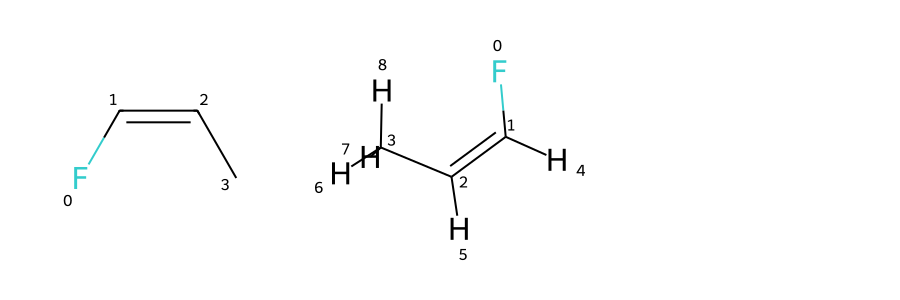

In [7]:
smiles_2 = "F\C=C/C"
#F/C(Br)=C(/Cl)I
mol_izq = Chem.MolFromSmiles(smiles_2)

# Add hydrogens
mol_izqh = Chem.AddHs(mol_izq)
Chem.AllChem.EmbedMolecule(mol_izqh)
# Display both structures

Chem.MolToXYZFile(mol_izqh,"toluene_2.xyz")
Draw.MolsToGridImage([mol_izq, mol_izqh], subImgSize=(300,300))

In [8]:
#Crea una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_izqh.GetConformer(0),1,2,3,6,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol_izqh, f"{i}.xyz")


In [9]:
from pyscf import gto, dft
# Cargar la molécula desde el archivo XYZ
mol_izqhh = gto.M(atom="toluene_2.xyz")

# Establecer la base de funciones
mol_izqhh.basis = "3-21G"

# Configurar el método de DFT (Kohn-Sham) y la función de intercambio-correlación
mf = dft.KS(mol_izqhh)
mf.xc = 'b3lyp'

# Calcular la energía total
energy_1 = mf.kernel()

# Imprimir la energía total
print("Energía total de los reactivos es: ", energy_1)

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -214.251651928337
Energía total de los reactivos es:  -214.25165192833737


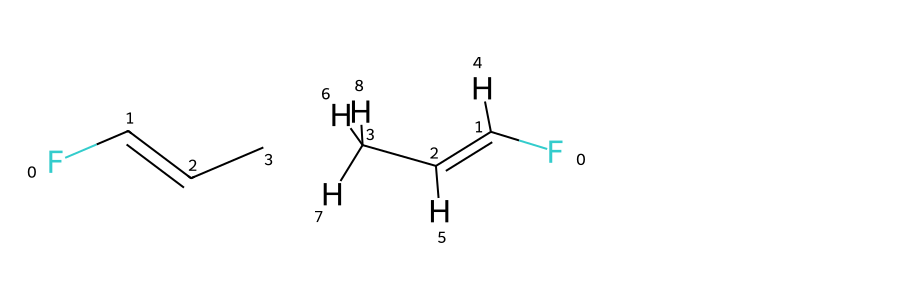

In [10]:
# SMILES notation for the molecule
smiles = "F/C=C/C"

# Create a molecule from the SMILES notation
mol = Chem.MolFromSmiles(smiles)

# Add hydrogens to the molecule
mol_h = Chem.AddHs(mol)

# Generate a 3D conformer for the molecule
Chem.AllChem.EmbedMolecule(mol_h)

# Save the molecule in XYZ format for future use
Chem.MolToXYZFile(mol_h, "toluene.xyz")
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))


In [11]:
#Crea una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_h.GetConformer(0),1,2,3,6,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol_h, f"{i}.xyz")

In [12]:


# Cargar la molécula desde el archivo XYZ
mol_hh = gto.M(atom="toluene.xyz")

# Establecer la base de funciones
mol_hh.basis = "3-21G"

# Configurar el método de DFT (Kohn-Sham) y la función de intercambio-correlación
mf = dft.KS(mol_hh)
mf.xc = 'b3lyp'

# Calcular la energía total
energy = mf.kernel()

# Imprimir la energía total
print("Energía total de  los productos es:", energy)

converged SCF energy = -214.251852671681
Energía total de  los productos es: -214.25185267168143


In [13]:
energia_activacion = energy - energy_1
print("La energia de activacion es: ", energia_activacion)
print("La reacion es exotermica")

La energia de activacion es:  -0.00020074334406672278
La reacion es exotermica


In [ ]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

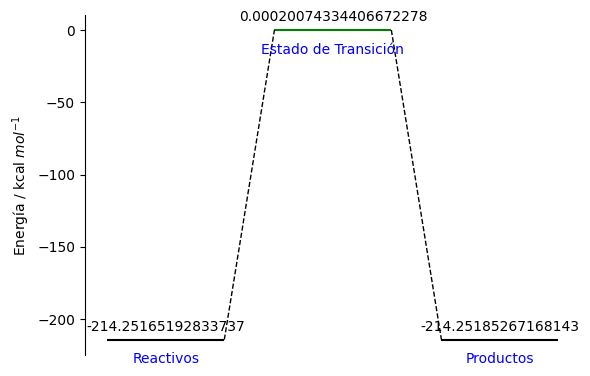

In [24]:
import matplotlib.pyplot as plt
from energydiagram import ED

energia_reactivos = energy_1
energia_productos = energy


energia_activacion = energia_reactivos - energia_productos


diagram = ED()


diagram.add_level(energia_reactivos, 'Reactivos')
diagram.add_level(energia_activacion, 'Estado de Transición', color='g')
diagram.add_level(energia_productos, 'Productos')


diagram.add_link(0, 1)
diagram.add_link(1, 2)


diagram.plot(ylabel="Energía / kcal $mol^{-1}$")
plt.show()
